# trendlines(uptrend and downtrend)
# scoring

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.graph_objects as go
from convertdate import persian
import copy
from scipy.stats import linregress

In [19]:
file_path = "ticker_codes.json"

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
    
symbols_and_codes = [(item["code"], item["symbol"]) for item in data]
symbols_and_codes
    

[('7745894403636165', 'شپنا'),
 ('2400322364771558', 'شستا'),
 ('66772024744156373', 'فباهنر'),
 ('35425587644337450', 'فملی'),
 ('63917421733088077', 'وتجارت'),
 ('69143674941561637', 'پترول'),
 ('25244329144808274', 'فارس'),
 ('35424116338766901', 'حفارس'),
 ('65883838195688438', 'خودرو'),
 ('46348559193224090', 'فولاد'),
 ('35366681030756042', 'شبندر'),
 ('778253364357513', 'وبملت'),
 ('9098178887955847', 'شهر'),
 ('7395271748414592', 'وخارزم'),
 ('51617145873056483', 'شتران'),
 ('28864540805361867', 'فخوز'),
 ('66701874099226162', 'فاسمین'),
 ('26014913469567886', 'وغدیر'),
 ('28320293733348826', 'وبصادر'),
 ('71483646978964608', 'ذوب')]

In [20]:
df = pd.read_csv(f"c-71483646978964608-candle.csv").head(5)
df

Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         239        226        244          230     210506642   
1           1         231        230        239          238     213584985   
2           2         241        237        248          248     274807499   
3           3         252        245        256          249     317918782   
4           4         251        245        259          256     273617729   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111

In [21]:
for code, symbol in symbols_and_codes:
    print(pd.read_csv(f"c-{code}-candle.csv").head(5))
    print("_________________________________________")

   Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         477        465        486          465      80469368   
1           1         465        461        484          482     105718113   
2           2         488        471        488          484     104732569   
3           3         488        471        492          475     108795640   
4           4         476        467        481          477      81335616   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111  
_________________________________________
   Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         240        240        240          240       9378451   
1           1         248        248        248          248       4344609   
2           2         251        251        251          251       7498654   
3           3         258        258        258          258       6442297   
4           4  

In [22]:
DFs = {}
for code, symbol in symbols_and_codes:
    filename = f"c-{code}-candle.csv"
    DFs[symbol] = pd.read_csv(filename)

In [23]:
df_shapna = DFs["شپنا"]
df_shapna.head()

Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         477        465        486          465      80469368   
1           1         465        461        484          482     105718113   
2           2         488        471        488          484     104732569   
3           3         488        471        492          475     108795640   
4           4         476        467        481          477      81335616   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111

In [24]:
for symbol in DFs:
    DFs[symbol].drop("Unnamed: 0", axis=1, inplace=True)

In [25]:
df_shapna = DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume      date
0         477        465        486          465      80469368  13990105
1         465        461        484          482     105718113  13990106
2         488        471        488          484     104732569  13990109
3         488        471        492          475     108795640  13990110
4         476        467        481          477      81335616  13990111

In [121]:
def convert_persian_to_gregorian(persian_date):
    year = persian_date // 10000
    month = (persian_date // 100) % 100
    day = persian_date % 100
    gregorian_date = persian.to_gregorian(year, month, day)
    return pd.Timestamp(f"{gregorian_date[0]}-{gregorian_date[1]:02d}-{gregorian_date[2]:02d}")

In [ ]:
gregorian_DFs = copy.deepcopy(DFs)

for symbol in gregorian_DFs:
    gregorian_DFs[symbol]['date'] = gregorian_DFs[symbol]['date'].apply(convert_persian_to_gregorian)
    #gregorian_DFs[symbol].set_index('date', inplace=True)

In [135]:
df_shapna = gregorian_DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume
date                                                                   
2020-03-24         477        465        486          465      80469368
2020-03-25         465        461        484          482     105718113
2020-03-28         488        471        488          484     104732569
2020-03-29         488        471        492          475     108795640
2020-03-30         476        467        481          477      81335616

In [124]:
for symbol in gregorian_DFs:
    
    fig = go.Figure(data=[go.Candlestick(x=gregorian_DFs[symbol].index,
                                           open=gregorian_DFs[symbol]['open_price'],
                                           high=gregorian_DFs[symbol]['max_price'],
                                           low=gregorian_DFs[symbol]['min_price'],
                                           close=gregorian_DFs[symbol]['close_price'])])

    fig.update_layout(title=f'Candlestick Chart for {symbol}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)


    fig.show()

In [26]:
def persian_date_to_string(persian_date):
    year = persian_date // 10000
    month = (persian_date // 100) % 100
    day = persian_date % 100
    return f"{year}/{month:02d}/{day:02d}"

In [27]:
persian_DFs = copy.deepcopy(DFs)

for symbol in persian_DFs:
    persian_DFs[symbol]['date'] = persian_DFs[symbol]['date'].apply(persian_date_to_string)
    #persian_DFs[symbol].set_index('date', inplace=True)

In [28]:
df_shapna = persian_DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume        date
0         477        465        486          465      80469368  1399/01/05
1         465        461        484          482     105718113  1399/01/06
2         488        471        488          484     104732569  1399/01/09
3         488        471        492          475     108795640  1399/01/10
4         476        467        481          477      81335616  1399/01/11

In [29]:
for symbol in persian_DFs:
    
    fig = go.Figure(data=[go.Candlestick(x=persian_DFs[symbol]['date'],
                                           open=persian_DFs[symbol]['open_price'],
                                           high=persian_DFs[symbol]['max_price'],
                                           low=persian_DFs[symbol]['min_price'],
                                           close=persian_DFs[symbol]['close_price'])])

    fig.update_layout(title=f'Candlestick Chart for {symbol}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)


    fig.show()

In [43]:
df = copy.deepcopy(persian_DFs["شپنا"])
df.head()

open_price  min_price  max_price  close_price  trade_volume        date
0         477        465        486          465      80469368  1399/01/05
1         465        461        484          482     105718113  1399/01/06
2         488        471        488          484     104732569  1399/01/09
3         488        471        492          475     108795640  1399/01/10
4         476        467        481          477      81335616  1399/01/11

In [52]:
def find_trendlines(df, window=1):
    highs = df['close_price'].rolling(window).max()
    lows = df['close_price'].rolling(window).min()

    df['number'] = np.arange(len(df)) + 1

    # Calculate uptrend line
    df_high = df[['number', 'close_price']].copy()
    while len(df_high) > 2:
        slope_up, intercept_up, _, _, _ = linregress(x=df_high['number'], y=df_high['close_price'])
        df_high = df_high.loc[df_high['close_price'] > slope_up * df_high['number'] + intercept_up]

    # Calculate downtrend line
    df_low = df[['number', 'close_price']].copy()
    while len(df_low) > 2:
        slope_down, intercept_down, _, _, _ = linregress(x=df_low['number'], y=df_low['close_price'])
        df_low = df_low.loc[df_low['close_price'] < slope_down * df_low['number'] + intercept_down]

    df['uptrend'] = slope_up * df['number'] + intercept_up
    df['downtrend'] = slope_down * df['number'] + intercept_down

    return df

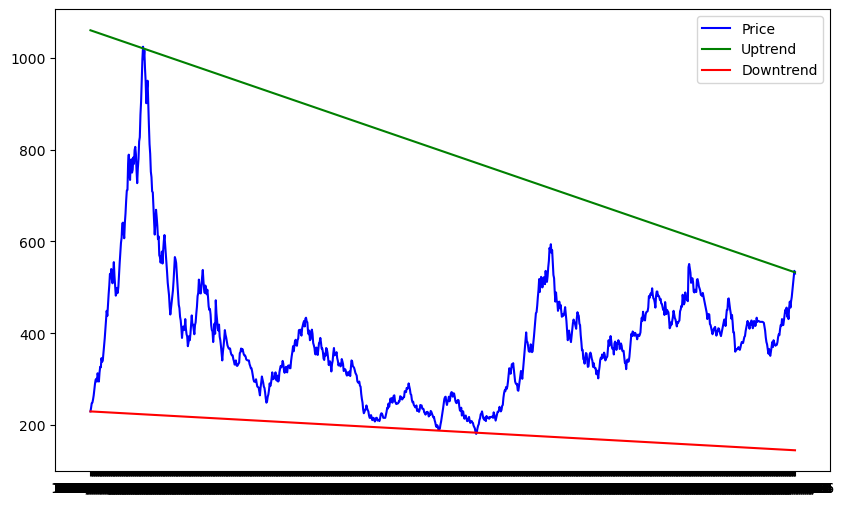

In [53]:
# Find trendlines
df = find_trendlines(df)

# Plot the data with trendlines
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close_price'], label='Price', color='blue')
plt.plot(df['date'], df['uptrend'], label='Uptrend', color='green')
plt.plot(df['date'], df['downtrend'], label='Downtrend', color='red')
plt.legend()
plt.show()

In [54]:
for symbol in persian_DFs:
    
    df = find_trendlines(persian_DFs[symbol])
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df['date'], y=df['close_price'], mode='lines', name='Close Price', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['date'], y=df['uptrend'], mode='lines', name='Uptrend', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=df['date'], y=df['downtrend'], mode='lines', name='Downtrend', line=dict(color='red')))
    
    fig.update_layout(title=f'{symbol}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      template='plotly')

    fig.show()